<a href="https://colab.research.google.com/github/atul1234anand/DBMS-project-trip-booking/blob/master/Prg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import*
from fastai.vision import*
from fastai.metrics import error_rate

In [18]:
path = untar_data(URLs.PETS)
path


PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [19]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_ann = path/'annotations'
path_im = path/'images'

 A data bunch contains the training data, validation data and the test data. Here the data is stored along with its labels(Eg: Images and label, text and labels etc).Normailize is used to make the mean and standard deviation of your data normal.

In [21]:
fname = get_image_files(path_im)fastai/course-v3
pat = r'/([^/]+)_\d+.jpg$'
data = ImageDataBunch.from_name_re(path_im,fname,pat,ds_tfms = get_transforms(),size=224)
data.normalize(imagenet_stats)


ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
german_shorthaired,yorkshire_terrier,Bombay,boxer,boxer
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
leonberger,miniature_pinscher,pug,samoyed,english_cocker_spaniel
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

Using the show batch method we can show the content of the batch file (image + image name)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
37


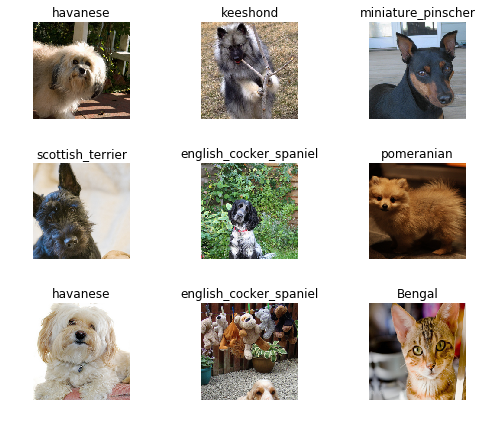

In [22]:
data.show_batch(rows=3, figsize=(7,6))
print(data.classes)
print(len(data.classes))

Here we are building a model that works on a perviously built model called resnet34 which had a large collection of images. This follows the concept of transfer learning where we use one previously built data set to engineer better, more fine tuned datasets. Validation set is a set that our model never gets to look at and metrics mentioned below essentiallly work on this validation set. Data batch contains the validation set.

In [0]:
learner = cnn_learner(data,models.resnet34,metrics = error_rate)

In [26]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.367898,0.358254,0.102165,01:22
1,0.568873,0.271991,0.089310,01:23
2,0.357065,0.225006,0.075778,01:25
3,0.250702,0.221339,0.074425,01:25


In [0]:
learner.save('stage1')

We begin by classifying whatever we have modelled. Then we plot the losses by making a prediction and thereby display the top losses. We print 4 values predicted class, actual class, loss and probability of the actual. 
For eg: We predicted that the first animal is a chihuahua instead of a st. bernard and the probability of st. Bernard = 0.00

In [0]:
interp = ClassificationInterpretation.from_learner(learner)


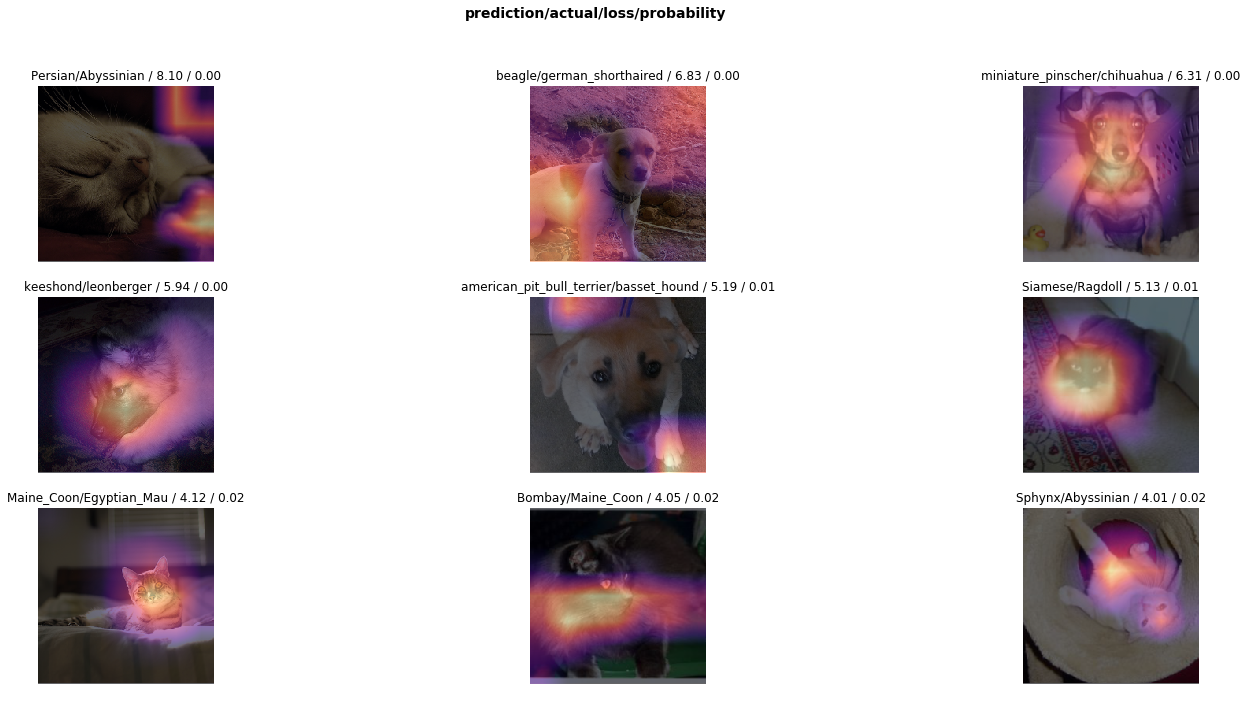

In [11]:
interp.plot_top_losses(9, figsize=(25,11))


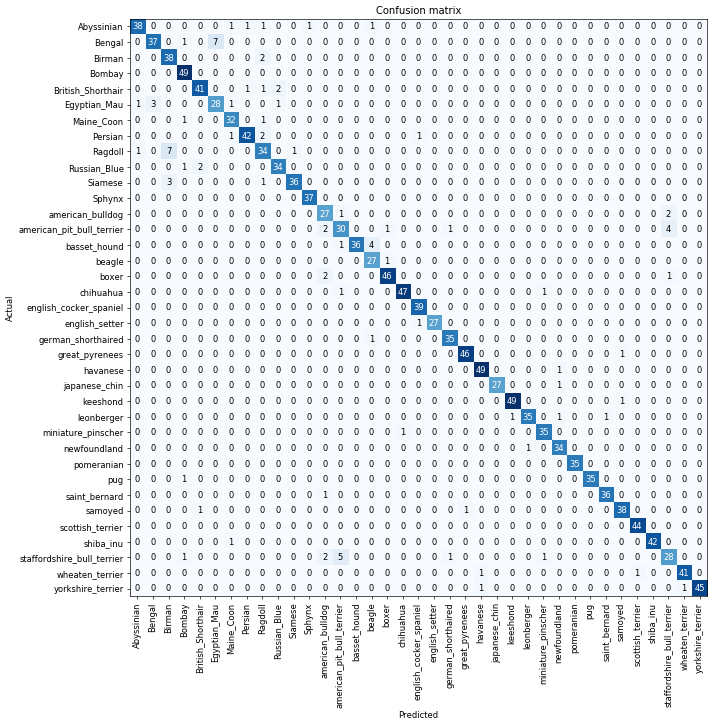

In [12]:
interp.plot_confusion_matrix(figsize=(12,12),dpi = 60)


In [13]:
interp.most_confused(3)

[('Bengal', 'Egyptian_Mau', 7),
 ('Ragdoll', 'Birman', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('basset_hound', 'beagle', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Siamese', 'Birman', 3)]

Learning rate helps us understand the fastest we can train a neural network.

In [14]:
learner.load('stage1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
german_shorthaired,yorkshire_terrier,boxer,leonberger,havanese
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Birman,Sphynx,Birman,Russian_Blue,great_pyrenees
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


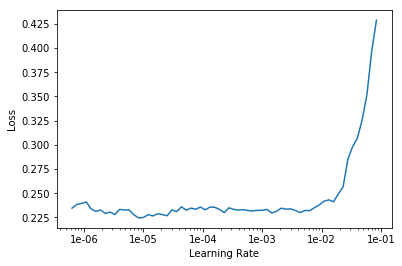

In [28]:
learner.lr_find()
learner.recorder.plot()

In [31]:
learner.unfreeze()
learner.fit_one_cycle(4,max_lr = slice(1e-05,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.130365,0.253197,0.081191,01:26
1,0.193853,0.290796,0.081867,01:26
2,0.118743,0.227885,0.068336,01:27
3,0.076972,0.223075,0.066982,01:26


In [41]:
doc(ImageDataBunch.from_name_re)

TypeError: ignored

In [0]:
data2 = ImageDataBunch.from_name_re(path_im, fname,pat, ds_tfms=get_transforms(),
                                   size=299,bs = 10)

In [0]:
learner2 = cnn_learner(data2, models.resnet50, metrics = error_rate)

In [48]:
learner2.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


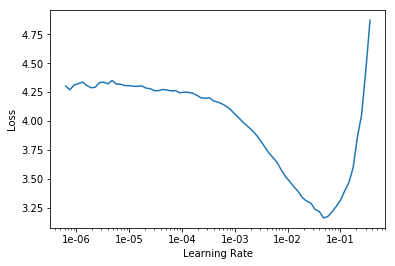

In [49]:
learner2.recorder.plot()

In [53]:
learner2.unfreeze()
learner2.fit_one_cycle(4,max_lr = slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.756502,1.754673,0.506766,02:29
1,1.471555,18.737577,0.411367,02:30
2,0.967825,2.414496,0.221245,02:29
3,0.723272,1.374745,0.161705,02:30
